In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
feats = pd.read_csv('train_set.csv')
test_df = pd.read_csv('test_set.csv')
label=pd.read_csv('training_label.csv')
train_df = pd.merge(feats,label,on='id')

In [5]:
train_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [ ]:
#Bubble plot of quantity vs quality
#line plot of longitude vs latitude
#bar chart od source

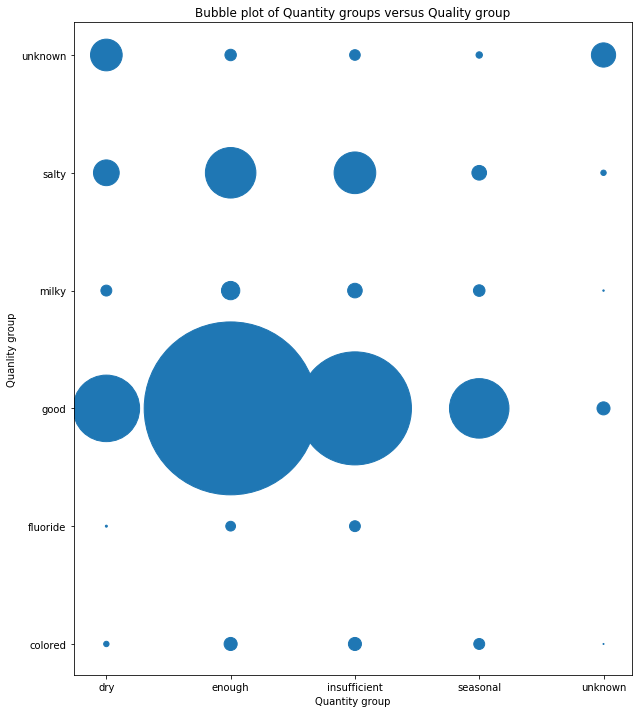

In [9]:
label_x, x = np.unique(train_df['quantity_group'], return_inverse=True)
label_y, y = np.unique(train_df['quality_group'], return_inverse=True)
xy, cnts = np.unique((x,y), axis=1, return_counts=True)
plt.figure(figsize=(10,12))
plt.scatter(xy[0], xy[1], s=cnts)
plt.xticks(range(len(label_x)), label_x)
plt.yticks(range(len(label_y)), label_y)
plt.title('Bubble plot of Quantity groups versus Quality group')
plt.xlabel('Quantity group')
plt.ylabel('Quanlity group')
plt.show()

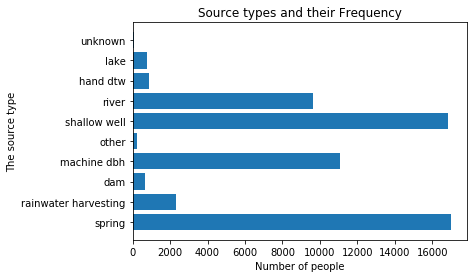

In [11]:
import collections
counts = collections.Counter(train_df['source'])
plt.barh(range(len(counts)), list(counts.values()), tick_label=list(counts.keys()))
plt.xlabel('Number of people')
plt.ylabel('The source type')
plt.title('Source types and their Frequency')
plt.show()

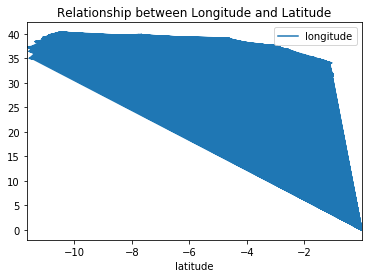

In [14]:
train_df.plot(kind='line',x='latitude',y='longitude',title='Relationship between Longitude and Latitude')
plt.show()

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [17]:
train_df.corr()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,1.000000,-0.005321,-0.004692,-0.001348,0.001718,-0.002629,-0.003028,-0.003044,-0.002813,-0.002082
amount_tsh,-0.005321,1.000000,0.076650,0.022134,-0.052670,0.002944,-0.026813,-0.023599,0.016288,0.067915
gps_height,-0.004692,0.076650,1.000000,0.149155,-0.035751,0.007237,-0.183521,-0.171233,0.135003,0.658727
longitude,-0.001348,0.022134,0.149155,1.000000,-0.425802,0.023873,0.034197,0.151398,0.086590,0.396732
latitude,0.001718,-0.052670,-0.035751,-0.425802,1.000000,0.006837,-0.221018,-0.201020,-0.022152,-0.245278
num_private,-0.002629,0.002944,0.007237,0.023873,0.006837,1.000000,-0.020377,-0.004478,0.003818,0.026056
region_code,-0.003028,-0.026813,-0.183521,0.034197,-0.221018,-0.020377,1.000000,0.678602,0.094088,0.031724
district_code,-0.003044,-0.023599,-0.171233,0.151398,-0.201020,-0.004478,0.678602,1.000000,0.061831,0.048315
population,-0.002813,0.016288,0.135003,0.086590,-0.022152,0.003818,0.094088,0.061831,1.000000,0.260910
construction_year,-0.002082,0.067915,0.658727,0.396732,-0.245278,0.026056,0.031724,0.048315,0.260910,1.000000


In [18]:
train_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


## Dealing with Outliers...

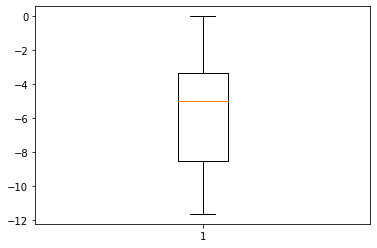

In [19]:
lists='amount_tsh gps_height longitude latitude num_private region_code district_code population construction_year'.split(' ')
plt.boxplot(train_df[lists[3]])
plt.show()

In [20]:
def drop_numerical_outliers(df,z=3):
    #constrains will contain true or false if it is belo w the threshold z or not
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x))<z,result_type = 'reduce').all(axis=1)
    df.drop(df.index[~constrains],inplace=True)


In [21]:
drop_numerical_outliers(train_df)

In [22]:
train_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,53037.000000,53037.000000,53037.000000,53037.000000,53037.000000,53037.000000,53037.000000,53037.000000,53037.000000,53037.000000
mean,37135.989460,232.258590,715.949036,34.871471,-5.657953,0.096838,11.068744,3.834474,140.080321,1294.621302
std,21468.657647,789.096018,701.813708,2.463480,2.724936,1.376093,6.490769,4.246780,230.844874,953.522369
min,0.000000,0.000000,-90.000000,29.607122,-11.649440,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18528.000000,0.000000,0.000000,33.146188,-8.213032,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37108.000000,0.000000,524.000000,34.805562,-4.901750,0.000000,11.000000,3.000000,25.000000,1986.000000
75%,55705.000000,25.000000,1357.000000,36.900654,-3.339618,0.000000,17.000000,4.000000,200.000000,2004.000000
max,74247.000000,9000.000000,2628.000000,40.231707,-0.998464,35.000000,60.000000,33.000000,1590.000000,2013.000000


In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53037 entries, 0 to 59399
Data columns (total 41 columns):
id                       53037 non-null int64
amount_tsh               53037 non-null float64
date_recorded            53037 non-null object
funder                   49556 non-null object
gps_height               53037 non-null int64
installer                49545 non-null object
longitude                53037 non-null float64
latitude                 53037 non-null float64
wpt_name                 53037 non-null object
num_private              53037 non-null int64
basin                    53037 non-null object
subvillage               52666 non-null object
region                   53037 non-null object
region_code              53037 non-null int64
district_code            53037 non-null int64
lga                      53037 non-null object
ward                     53037 non-null object
population               53037 non-null int64
public_meeting           50327 non-null object
r

In [24]:
train_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional


## Dealing with Missing Values

In [25]:
train_df['funder'].value_counts()

Government Of Tanzania      8256
Danida                      3101
Hesawa                      1867
Kkkt                        1286
World Bank                  1232
                            ... 
Rc Njoro                       1
Juma                           1
Africa 2000 Network/undp       1
Mwl.Mwita                      1
Tgt                            1
Name: funder, Length: 1718, dtype: int64

In [26]:
for df in [train_df,test_df]:
    x = tuple(df['funder'].mode())[0]
    df['funder'].fillna(x,inplace=True)

In [27]:
train_df['installer'].value_counts()

DWE                 15475
Government           1613
RWE                  1171
Commu                1060
DANIDA               1047
                    ...  
Kwasenenge Group        1
LUKE SAMARAS LTD        1
Waheke                  1
Mgaya Mwita             1
Water Aid/DWE           1
Name: installer, Length: 1930, dtype: int64

In [28]:
for df in [train_df,test_df]:
    x = tuple(df['installer'].mode())[0]
    df['installer'].fillna(x,inplace=True)

In [29]:
train_df['scheme_name']

0                              Roman
1                                NaN
2        Nyumba ya mungu pipe scheme
4                                NaN
5                          Zingibali
                    ...             
59395         Losaa Kia water supply
59396    Ikondo electrical water sch
59397                            NaN
59398                            NaN
59399                            NaN
Name: scheme_name, Length: 53037, dtype: object

In [30]:
train_df['scheme_management'].value_counts()

VWC                 32977
WUG                  4154
Water authority      3052
WUA                  2757
Water Board          2705
Parastatal           1518
Company              1031
Private operator      895
Other                 676
SWC                    96
Trust                  49
None                    1
Name: scheme_management, dtype: int64

In [31]:
for df in [train_df,test_df]:
    x = tuple(df['scheme_management'].mode())[0]
    df['scheme_management'].fillna(x,inplace=True)

 For permit and public_meeting, the operation on the training and test will be different

In [32]:
test_df['permit'].value_counts()/test_df['permit'].count()

True     0.691136
False    0.308864
Name: permit, dtype: float64

In [33]:
from random import choices
mask0=test_df['permit'].isna()
length = sum(mask0)
replacement = choices([True,False],weights = [.7,.3],k=length)
test_df.loc[mask0,'permit']=replacement

In [34]:
test_df['permit'].describe()

count     14850
unique        2
top        True
freq      10281
Name: permit, dtype: object

In [35]:
test_df['public_meeting'].value_counts()/test_df['public_meeting'].count()

True     0.907976
False    0.092024
Name: public_meeting, dtype: float64

In [36]:
mask1=test_df['public_meeting'].isna()
length = sum(mask1)
replacement = choices([True,False],weights = [.9,.1],k=length)
test_df.loc[mask1,'public_meeting']=replacement

In [37]:
test_df['public_meeting'].value_counts()

True     13490
False     1360
Name: public_meeting, dtype: int64

In [38]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
id                       14850 non-null int64
amount_tsh               14850 non-null float64
date_recorded            14850 non-null object
funder                   14850 non-null object
gps_height               14850 non-null int64
installer                14850 non-null object
longitude                14850 non-null float64
latitude                 14850 non-null float64
wpt_name                 14850 non-null object
num_private              14850 non-null int64
basin                    14850 non-null object
subvillage               14751 non-null object
region                   14850 non-null object
region_code              14850 non-null int64
district_code            14850 non-null int64
lga                      14850 non-null object
ward                     14850 non-null object
population               14850 non-null int64
public_meeting           14850 non-null bool
rec

In [39]:
train_df['public_meeting'].count()

50327

In [40]:
train_df['permit'].count()

50042

In [41]:
train_df.shape

(53037, 41)

In [42]:

train_df.dropna(subset=['public_meeting','permit'])

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,Government Of Tanzania,0,DWE,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53037 entries, 0 to 59399
Data columns (total 41 columns):
id                       53037 non-null int64
amount_tsh               53037 non-null float64
date_recorded            53037 non-null object
funder                   53037 non-null object
gps_height               53037 non-null int64
installer                53037 non-null object
longitude                53037 non-null float64
latitude                 53037 non-null float64
wpt_name                 53037 non-null object
num_private              53037 non-null int64
basin                    53037 non-null object
subvillage               52666 non-null object
region                   53037 non-null object
region_code              53037 non-null int64
district_code            53037 non-null int64
lga                      53037 non-null object
ward                     53037 non-null object
population               53037 non-null int64
public_meeting           50327 non-null object
r

## Feature engineering

In [44]:
list(train_df.columns)

['id',
 'amount_tsh',
 'date_recorded',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'num_private',
 'basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'status_group']

In [45]:
train_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional


In [46]:
to_drop =['id','funder','date_recorded','num_private','scheme_name','region_code','lga',
       'ward','recorded_by','waterpoint_type_group','scheme_management','management_group','source_class','amount_tsh','subvillage','wpt_name','installer','construction_year','extraction_type','extraction_type_group','payment_type','quality_group','quantity_group','source']

useful=['longitude','latitude','gps_height','population','wpt_age']
dummable = ['basin','region','public_meeting','permit','extraction_type_class','management','payment','water_quality','quantity','source_type','waterpoint_type']

In [47]:
train_dropped = train_df[to_drop]
test_dropped = test_df[to_drop]

In [48]:
for df in [train_df,test_df]:
    df.drop(to_drop,axis=1,inplace=True)

In [49]:
train_df['wpt_age'] = 2020- train_dropped['construction_year'] 

In [50]:
test_df['wpt_age'] = 2020- test_dropped['construction_year']

In [51]:
train_df['wpt_age'].replace(2020,23,inplace = True)

In [52]:
test_df['wpt_age'].replace(2020,23,inplace = True)

In [53]:
#Dummies x One hot encoding

In [54]:
train_df.shape

(53037, 18)

In [55]:
x = pd.get_dummies(test_df[dummable])
y = pd.get_dummies(train_df[dummable])
z = pd.get_dummies(x['permit'])
t= pd.get_dummies(x['public_meeting'])

In [56]:
x['permit_False']=z[False]
x['permit_True']=z[True]
x['public_meeting_False']=t[False]
x['public_meeting_True']=t[True]
x.drop(['permit','public_meeting'],axis=1,inplace=True)

In [57]:
x['id'] = test_dropped['id']
test_df['id'] =  test_dropped['id']
test_df = pd.merge(test_df,x,on='id')
test_df = test_df.drop('id',axis=1)

In [58]:
y['id'] = train_dropped['id']
train_df['id'] =  train_dropped['id']
train_df = pd.merge(train_df,y,on='id')
train_df = train_df.drop('id',axis=1)

In [59]:
train_df.drop(dummable,axis=1,inplace=True)

In [60]:
test_df.drop(dummable,axis=1,inplace=True)

In [61]:
test_df.shape

(14850, 93)

In [62]:
train_df['status_group'].value_counts()

functional                 29429
non functional             19927
functional needs repair     3681
Name: status_group, dtype: int64

In [63]:
train_df

,gps_height,longitude,latitude,district_code,population,status_group,wpt_age,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,...,source_type_river/lake,source_type_shallow well,source_type_spring,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,1390,34.938093,-9.856322,5,109,functional,21,0,1,0,...,0,0,1,0,1,0,0,0,0,0
1,1399,34.698766,-2.147466,2,280,functional,10,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,686,37.460664,-3.821329,4,250,functional,11,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,31.130847,-1.825359,1,0,functional,23,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,39.172796,-4.765587,8,1,functional,11,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53032,1210,37.169807,-3.253847,5,125,functional,21,0,0,0,...,0,0,1,0,1,0,0,0,0,0
53033,1212,35.249991,-9.070629,4,56,functional,24,0,0,0,...,1,0,0,0,1,0,0,0,0,0
53034,0,34.017087,-8.750434,7,0,functional,23,0,0,0,...,0,0,0,0,0,0,0,1,0,0
53035,0,35.861315,-6.378573,4,0,functional,23,0,0,0,...,0,1,0,0,0,0,0,1,0,0
